# Aula de Viés e Variância 

# Objetivos de aula

- Caracterizar o trade-off entre viés e variância;
- Elucidar o conceito de Overfitting e Underfitting;
- Formular o conceito de Ridge e Lasso e utilizá-los no scikit-learn através de um exemplo prático;
- Entender as penalizações na função custo ao utilizar as técnicas de Lasso e Ridge;
- Como identificar uma situação de Overfitting e Underfitting através do conceito de Learning Curve e Validation Curve.

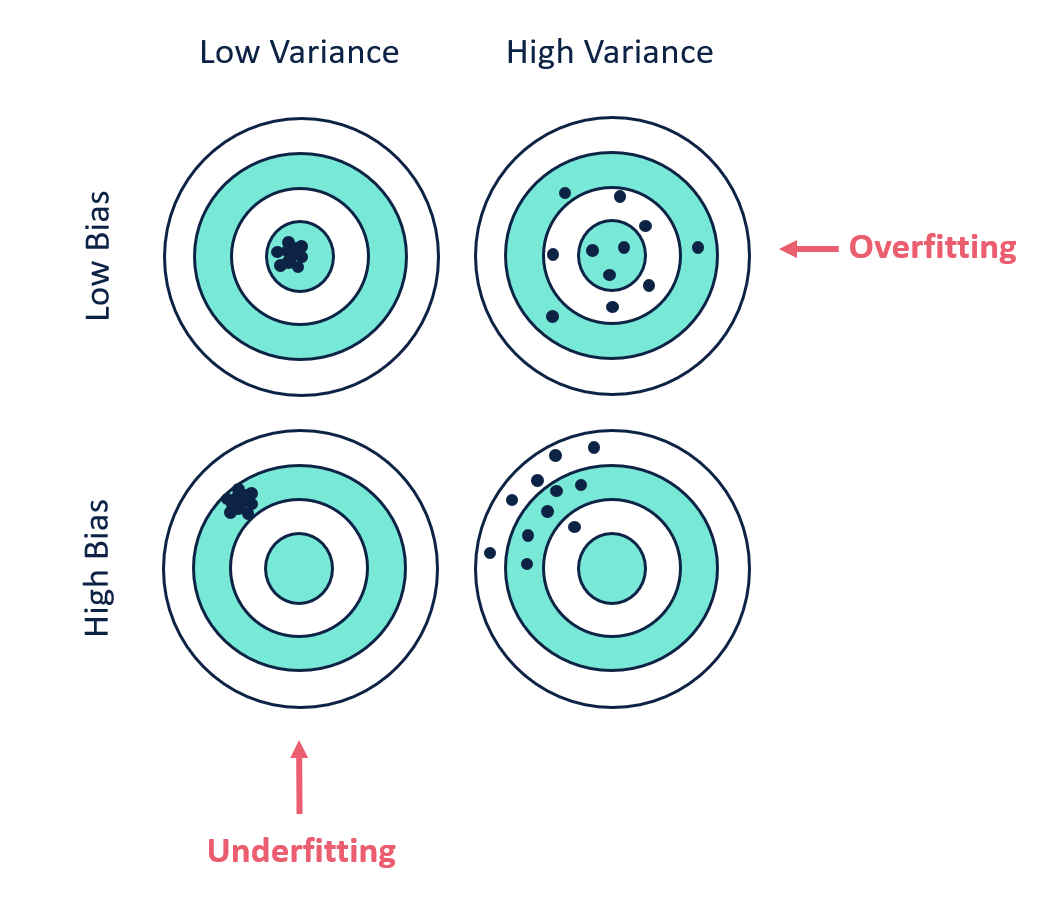

# Conceito de Viés

O viés pode ser compreendido como erro sistemático, visto que o algoritmo não é capaz de expressar o fenômeno estudado. Ou seja, por mais que seja utilizado amostras distintas ou maiores, a amostra nunca se aproximará do verdadeiro parâmetro populacional.

# Conceito de Variância

Já a variância pode ser compreendido como erro aleatório, pois captura nuânces das amostras utilizadas, uma vez que tende a construir regras complexas demais sem a quantidade de exemplos necessárias para o aprendizado do algoritmo.


# Overfitting e Underfitting

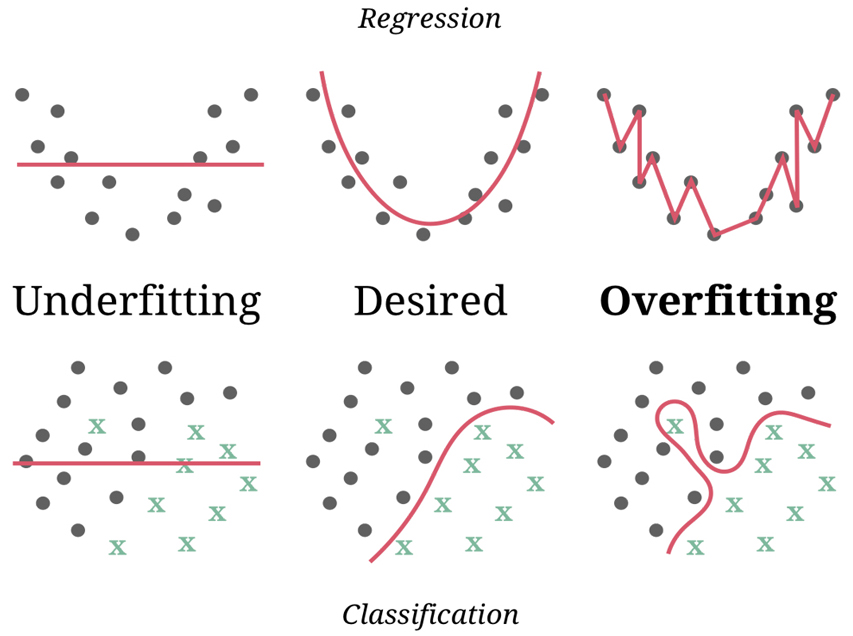

# Definição de Overfitting

- Um problema de overfitting consiste quando o bom desempenho no conjunto de dados de treinamento não é generalizado para os dados de teste.

- O overfitting ou superajuste dos dados de treinamento apresenta alta variância em relação aos dados de treino, ou seja, o modelo apresenta alta sensibilidade em ser treinado com dataset distintos.

# Circunstâncias que podem causar overfitting

- Um modelo mais complexo que a natureza do problema, de modo que o modelo desenvolve uma heurística capaz de identificar o relacionamento entre as variáveis explicativas e variável resposta. De modo, que fica em sincronia com o ruído aleatório dos dados;

- Existe um número maior de variáveis disponíveis em relação ao número de amostras.

# Maneiras de evitar overfitting:

# Existem algumas maneiras de se evitar o overfitting sendo elas: 

- Mecanismo de validação cruzada
- Regularização 
- Diminuição do número de variáveis.


# Underfitting

- Um modelo com underfitting é quando um modelo não está se ajustando aos dados de treinamento e apresenta alto viés.

# Como avaliar se um modelo está causando overfitting ou underfitting ?

Ao modelar um problema não sabemos qual é a especificação correta do modelo com antecedência, de modo que temos que comparar os resultados de treinamento e teste para avaliar se o modelo escolhido está causando overfitting ou underfitting.

# Possíveis cenários

- Baixo erro em dados de treino e alto erro em dados de teste aponta alta variância.


- Alto erro em dados de treino e erro similar em dados de teste aponta um alto viés.


- Alto erro em dados de treino e erro maior em dados de teste mostra que o modelo tem alto viés e alta variância.


- Baixo erro em dados de treino e baixo erro em dados de teste indica baixa variância e baixo viés.

In [1]:
from IPython.display import Image, HTML
from matplotlib import animation
Image(url='https://miro.medium.com/max/1520/1*u2MTHaUPMJ8rkTYjm2nHww.gif') 

# Trade-Off (Viés e Variância)

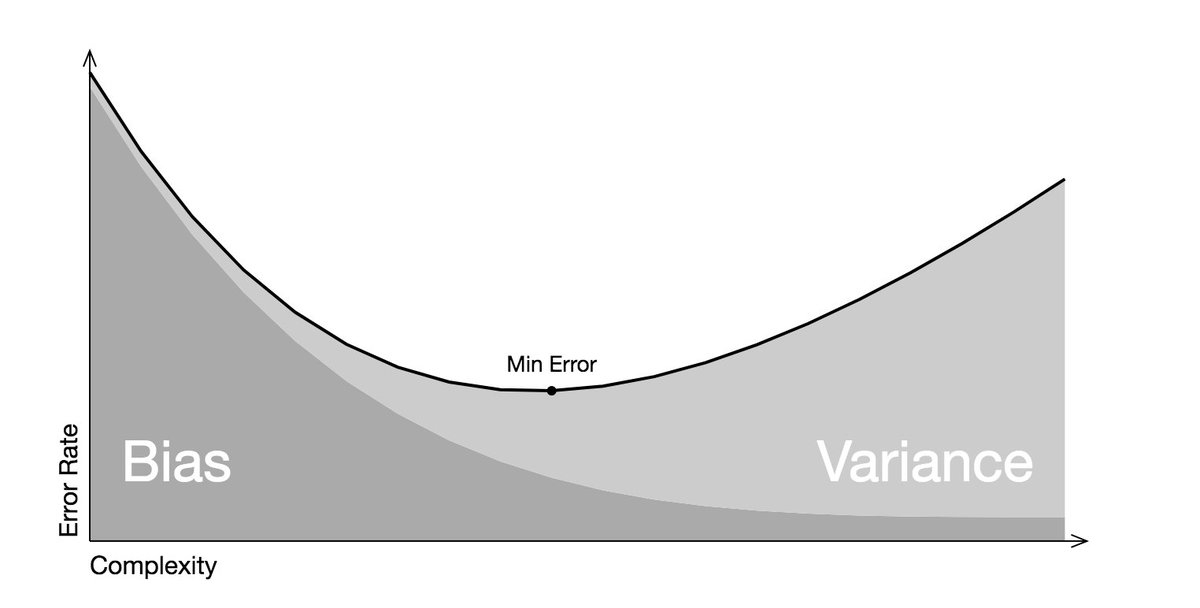

# Regularização 

## - A regularização aplica um ruído no modelo para diminuir o erro de variância.

As duas técnicas de regularização mais conhecidas se chamam Lasso e Ridge, também conhecidas como L1 e L2 respectivamente.
Essas duas técnicas empregam formulações diferentes para alterar a função custo usada no modelo ajustado. O objetivo de empregar essas técnicas é reduzir a complexidade do modelo e evitar o overfitting do modelo. 


# Lasso e Ridge - Graficamente

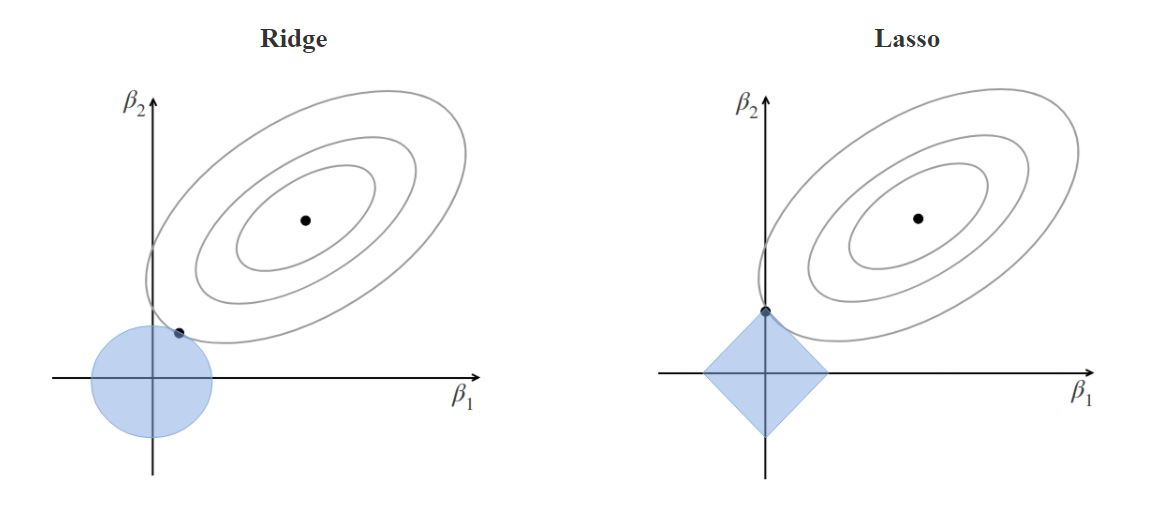

# Formulação do Lasso

- A penalização l1 além da regularização executa a seleção de variáveis visto que configura alguns coeficientes iguais a zero removendo alguns atributos do modelo;

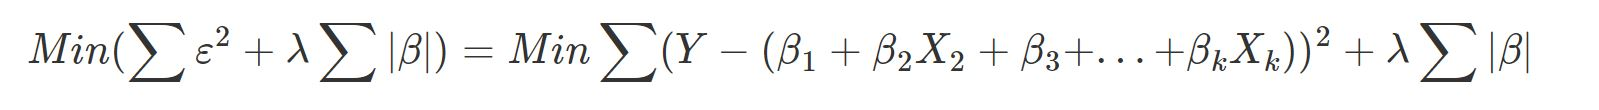
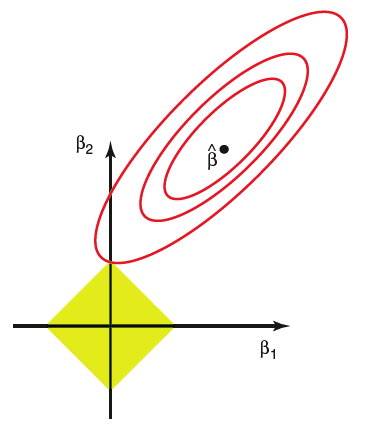

# Formulação do Ridge

- A penalização l2 ele suaviza os coeficientes em direção a zero. 

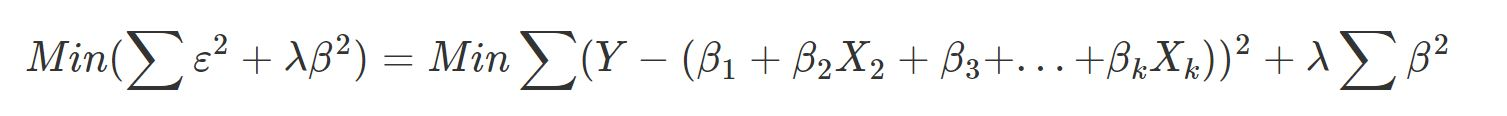

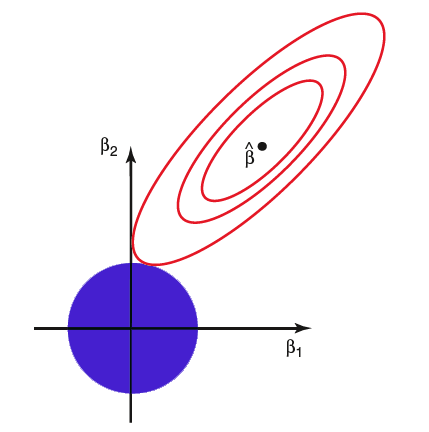

# Observação importante:

- Não é regularizado o termo de intercepto (beta zero). A restrição é apenas a soma dos quadrados dos coeficientes de regressão dos X’s.

# Quando usar Lasso ou Ridge ?

- O Lasso estabelece alguns coeficientes igual a zero funcionando como seletor de variável, coisa que não ocorre com o Ridge. 

- Os dois permitem usar variáveis correlacionadas, contudo resolvem o problema de multicolinearidade de modo diferente.

- No ridge os coeficientes das variáveis correlacionadas são similares; 

- No lasso uma das variáveis correlacionadas possuem um grande coeficiente e as demais variáveis correlacionadas são pertos ou iguais a zero; 


# Norma Elastic Net

É uma combinação da norma L1 e L2.


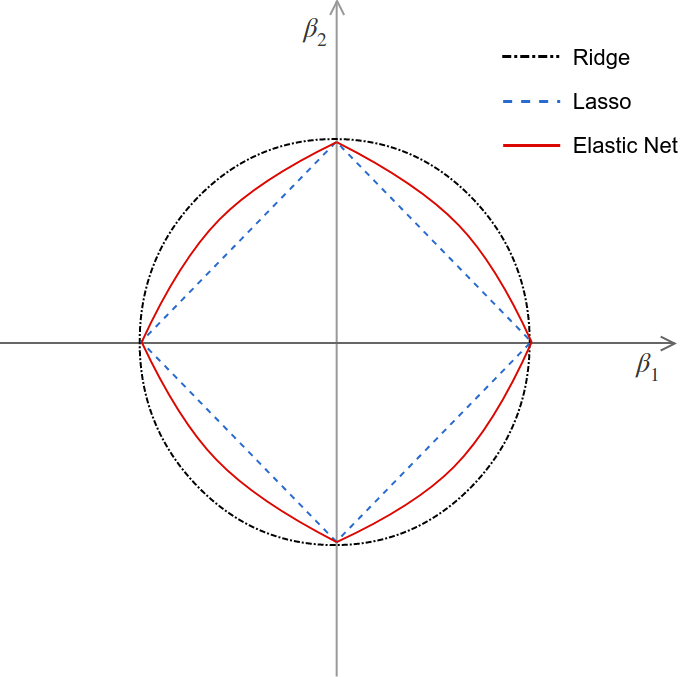

# Regressão Logística - Estimando os coeficientes

Quando um modelo está sendo executado ele está aprendendo as relações entre o logaritmo das chances da variável resposta e cada uma das variáveis explicativas. Em uma regressão logística os coeficientes e o intercepto podem ser encontrados por meio da função fit. Esse números calculados são chamados de parâmetros do modelo. Contudo, existe toda uma lógica para encontrar os melhores parâmetros para os modelos. Para isso será introduzido um conceito chamado de função custo.

# Função custo

A função custo é um termômetro para sabermos o quanto as nossas previsões dos modelos estão seu ajustando aos dados reais.

# Função de perda logarítmica 

Em contexto de classificações, principalmente, quando se usa regressão logística, a função custo típica é de perda logaritmica mais conhecida como log-loss ou entropia cruzada. 


# 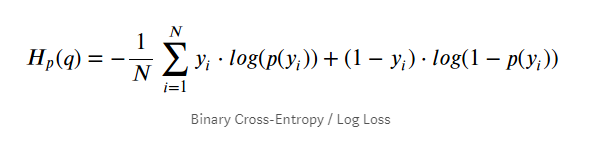 

- Espera-se que as probabilidades previstas sejam valores próximos de 1 de modo que a função custo seja pequena. Em contextos que as previsões estejam próximas de 0, ela será maior e a função custo também.

# 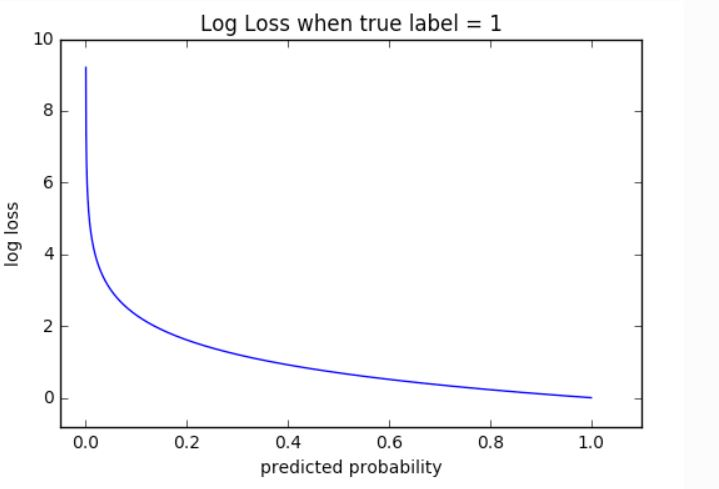

# Lasso para função custo de regressão logística

# Norma 1 

É apenas a soma dos valores absolutos de todos os coeficientes das variáveis.


# Termo C

Há um fator C que é multiplicado pelo numerador da fração, é o inverso da força de regularização. Valores maiores para C levam a menos regularização.

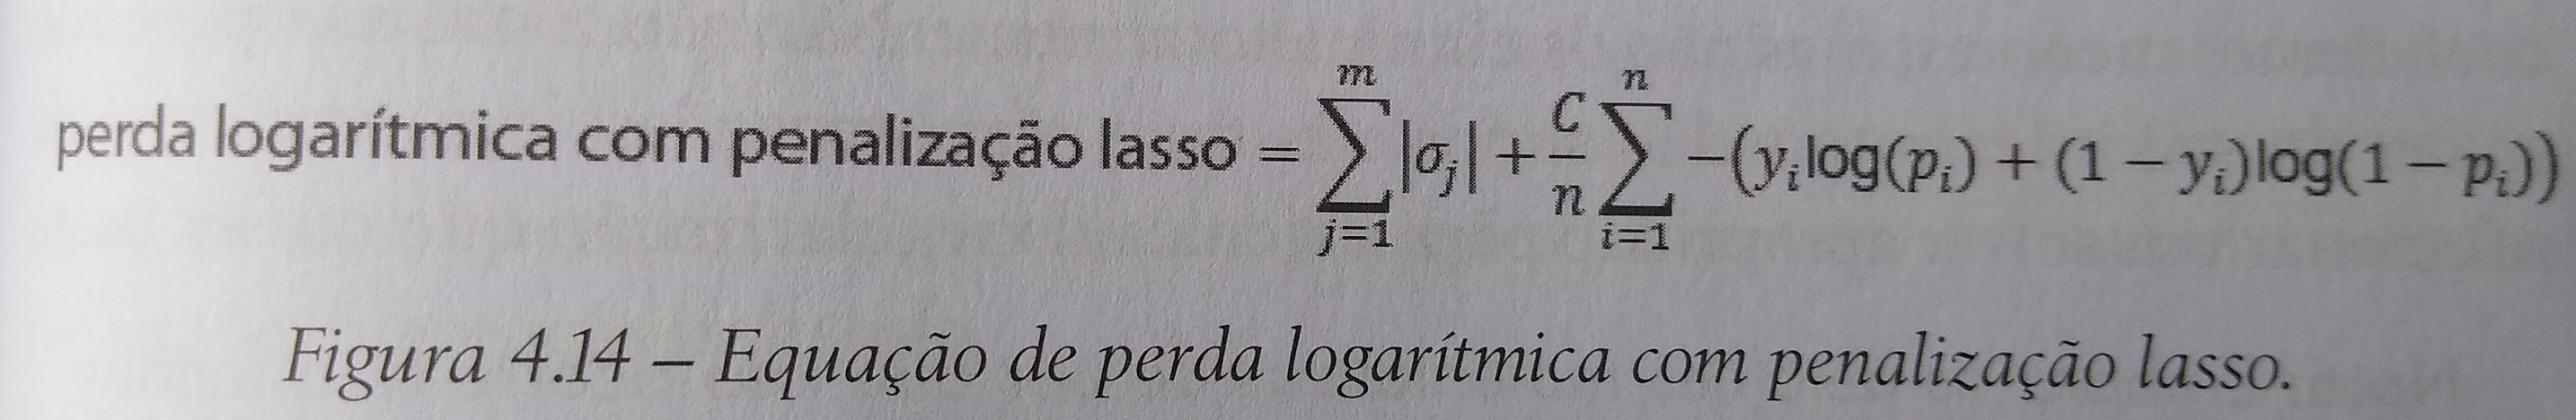

# Ridge para função custo de regressão logística

# Norma 2


Nesse caso, a penalização consiste nos quadrados dos coeficientes, ao invés de seus módulos.

- Ridge é responsável por diminuir a complexidade do modelo, contudo o número de variáveis permanece iguais.

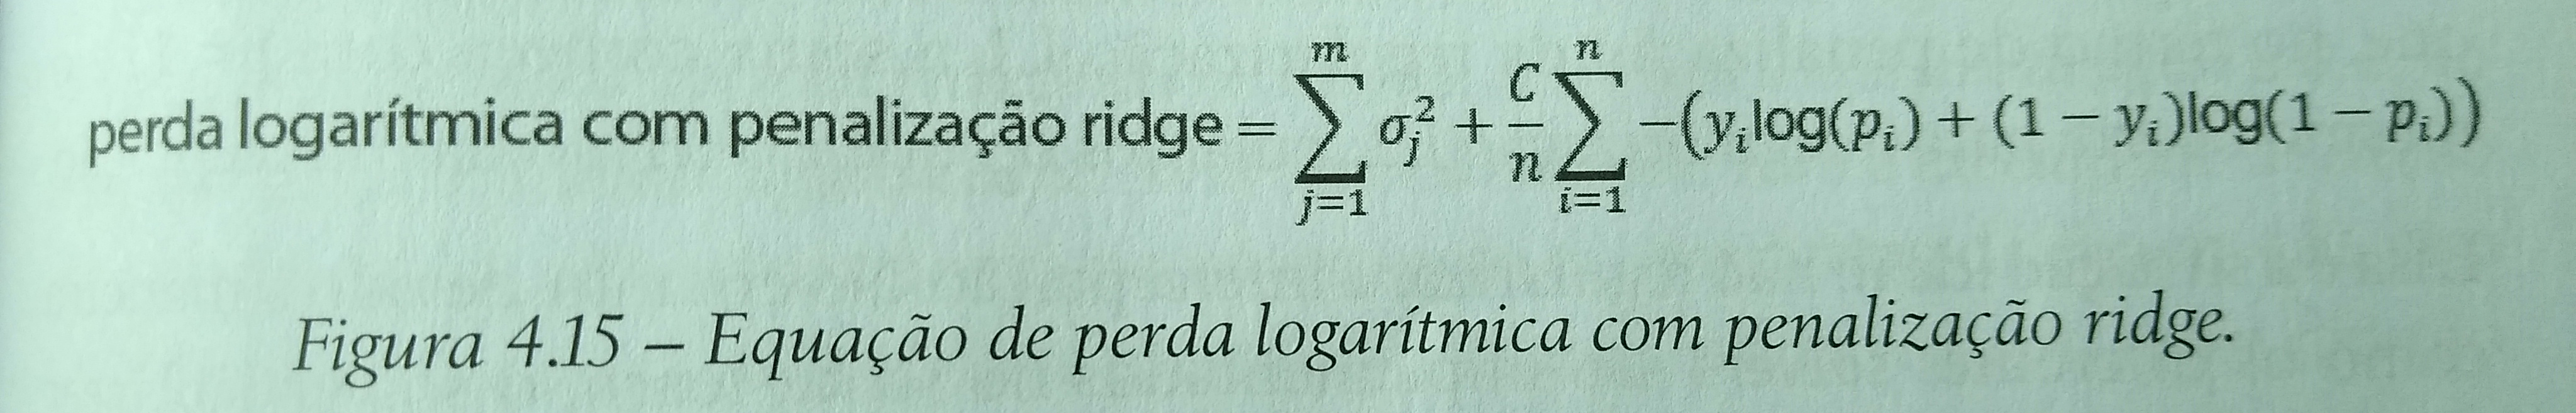

# Importando os pacotes

In [2]:
import pandas as pd
import plotly_express as px
import seaborn as sns
import janitor
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import ValidationCurve
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import cv_scores
from sklearn.model_selection import validation_curve
import warnings

warnings.filterwarnings("ignore")

# Estabelecendo os padrões de imagem

In [3]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

# Configurando apresentação de linhas e colunas

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_rows = 100

# Lendo o arquivo

In [5]:
turnover = pd.read_csv(r'C:\Users\Angelo\Desktop\Trade off - Aula\arquivo\employee.csv').clean_names()

In [6]:
turnover.head()

age attrition     businesstravel  dailyrate              department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   distancefromhome  education educationfield  employeecount  employeenumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  relationshipsatisfaction standardhours  stockoptionlevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   totalworkingyears  trainingtimeslastyear worklifebalance  yearsatcompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  yearsincurrentrole  yearssincelastpromotion  yearswithcurrmanager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# Verificando o nome das colunas

In [7]:
turnover.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [8]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

# Mudando de integer para objeto

In [9]:
turnover['education'] = turnover.education.astype(object)
turnover['educationfield'] = turnover.educationfield.astype(object)
turnover['environmentsatisfaction'] = turnover.education.astype(object)
turnover['jobinvolvement'] = turnover.jobinvolvement.astype(object)
turnover['joblevel'] = turnover.joblevel.astype(object)
turnover['jobsatisfaction'] = turnover.jobsatisfaction.astype(object)
turnover['maritalstatus'] = turnover.maritalstatus.astype(object)
turnover['relationshipsatisfaction'] = turnover.relationshipsatisfaction.astype(object)
turnover['stockoptionlevel'] = turnover.stockoptionlevel.astype(object)
turnover['worklifebalance'] = turnover.worklifebalance.astype(object)
turnover['performancerating'] = turnover.performancerating.astype(object)

# Definindo a variável resposta e as variáveis explicativas

In [10]:
y = turnover.loc[:,['attrition']]
X = turnover.drop(columns=['attrition'])

# Aplicando variáveis dummies

In [11]:
X = pd.get_dummies(X)
X.head()

age  dailyrate  distancefromhome  employeecount  employeenumber  \
0   41       1102                 1              1               1   
1   49        279                 8              1               2   
2   37       1373                 2              1               4   
3   33       1392                 3              1               5   
4   27        591                 2              1               7   

   hourlyrate  monthlyincome  monthlyrate  numcompaniesworked  \
0          94           5993        19479                   8   
1          61           5130        24907                   1   
2          92           2090         2396                   6   
3          56           2909        23159                   1   
4          40           3468        16632                   9   

   percentsalaryhike  ...  relationshipsatisfaction_3  \
0                 11  ...                           0   
1                 23  ...                           0   
2                 15  ...                           0   
3                 11  ...                           1   
4                 12  ...                           0   

   relationshipsatisfaction_4  stockoptionlevel_0  stockoptionlevel_1  \
0                           0                   1                   0   
1                           1                   0                   1   
2                           0                   1                   0   
3                           0                   1                   0   
4                           1                   0                   1   

   stockoptionlevel_2  stockoptionlevel_3  worklifebalance_1  \
0                   0                   0                  1   
1                   0                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   worklifebalance_2  worklifebalance_3  worklifebalance_4  
0                  0                  0                  0  
1                  0                  1                  0  
2                  0                  1                  0  
3                  0                  1                  0  
4                  0                  1                  0  

[5 rows x 83 columns]

In [12]:
le = preprocessing.LabelBinarizer()
y = le.fit_transform(y)
y = np.ravel(y)
y.shape

(1470,)

In [13]:
log = LogisticRegression(solver = 'lbfgs', max_iter = 10000,penalty='l2')

scores_precision = cross_val_score(log, X, y, cv=5, scoring ='precision')
scores_accuracy = cross_val_score(log, X, y, cv=5, scoring ='accuracy')
scores_recall = cross_val_score(log, X, y, cv=5, scoring ='recall')

print(scores_recall) 
print(scores_accuracy)
print(scores_precision)


[0.5        0.33333333 0.4893617  0.40425532 0.40425532]
[0.90136054 0.86734694 0.87755102 0.86394558 0.88095238]
[0.82758621 0.69565217 0.65714286 0.61290323 0.73076923]


# Mecanismo de validação cruzada

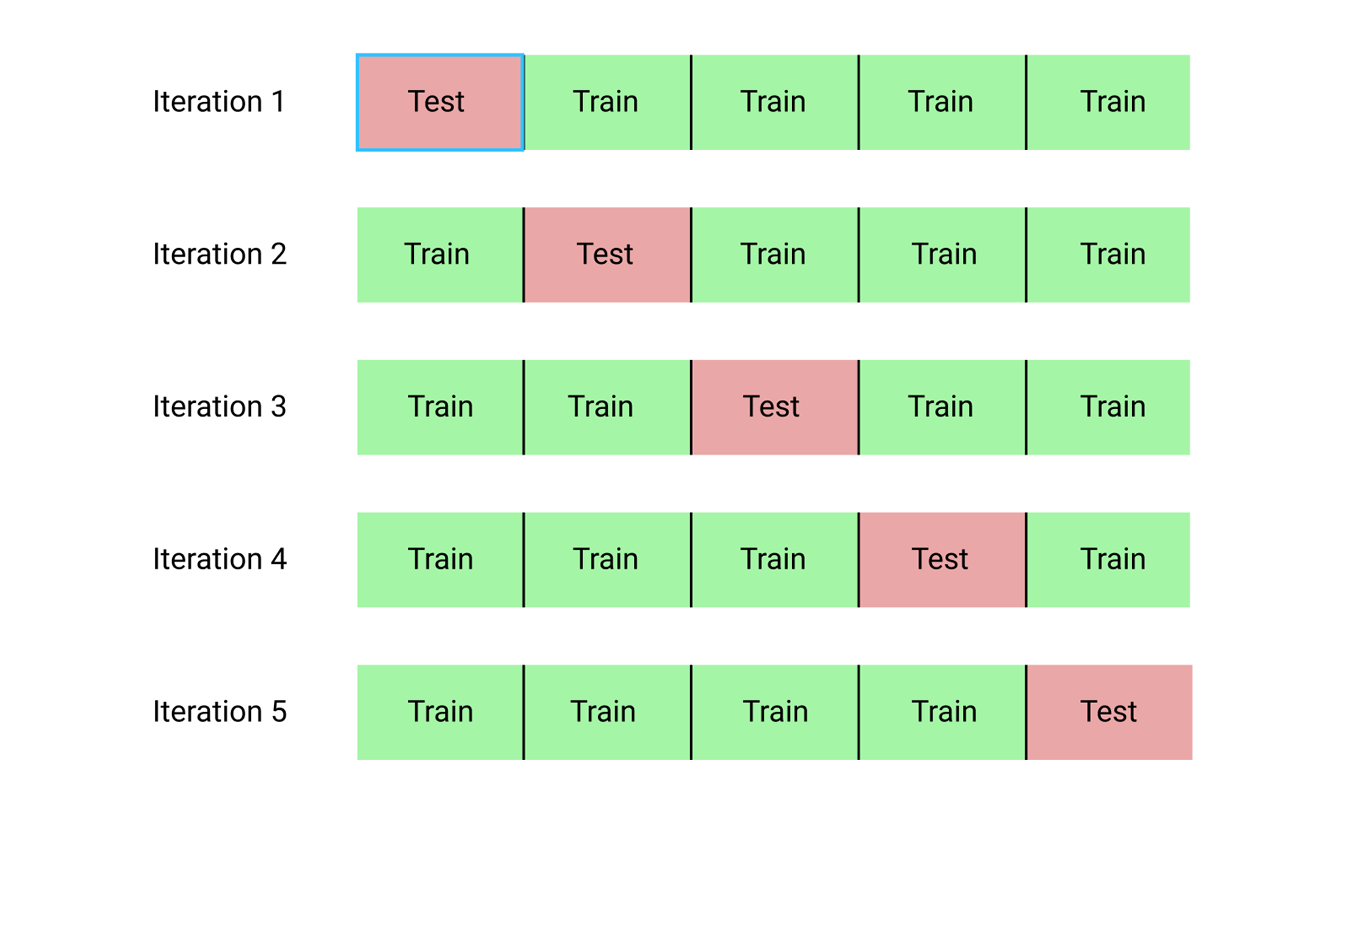

# Solver

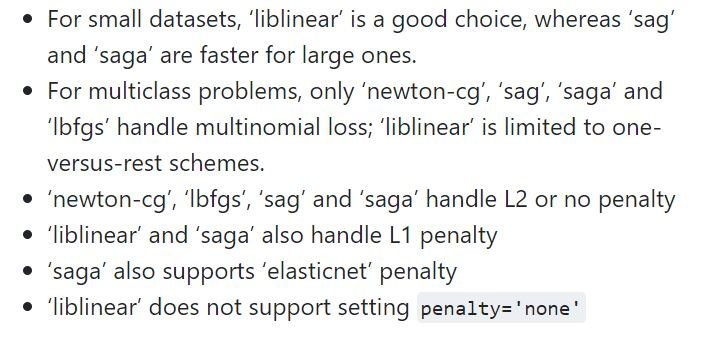

- Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [14]:
from sklearn.model_selection import validation_curve

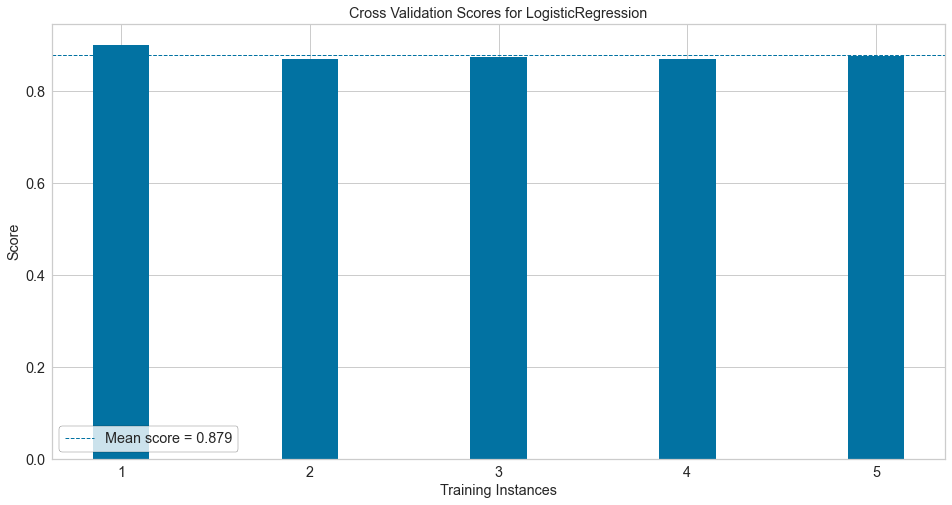

In [15]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver = 'liblinear', max_iter = 10000)

train_scores, test_scores = validation_curve(log, X, y, param_name="C",param_range=[1,10,100,1000],cv=5)

visualizer = cv_scores(log, X, y, cv=5, scoring='accuracy')

In [16]:
train_scores


array([[0.89115646, 0.89285714, 0.89795918, 0.87840136, 0.875     ],
       [0.86989796, 0.8962585 , 0.8920068 , 0.90306122, 0.8877551 ],
       [0.88690476, 0.89115646, 0.86479592, 0.89795918, 0.88520408],
       [0.89115646, 0.89285714, 0.89710884, 0.90306122, 0.89030612]])

In [17]:
test_scores

array([[0.90136054, 0.8707483 , 0.87414966, 0.8707483 , 0.87755102],
       [0.85714286, 0.86394558, 0.8707483 , 0.87414966, 0.8877551 ],
       [0.89795918, 0.86054422, 0.86734694, 0.86394558, 0.88095238],
       [0.89795918, 0.8707483 , 0.87755102, 0.8707483 , 0.8877551 ]])

# Validation Curve

- É muito útil plotar a  influência de um único hiperparâmetro no treino e teste e verificar se o estimador está com overfitting ou underfitting para alguns valores desse hiperparâmetro. 

- Se o escore de treino e o escore de validação estão baixos, o estimador sofre de underfitting 
- Se o escore de treino é alto e o escore de validação é baixo, o estimador sofre de overfitting. 

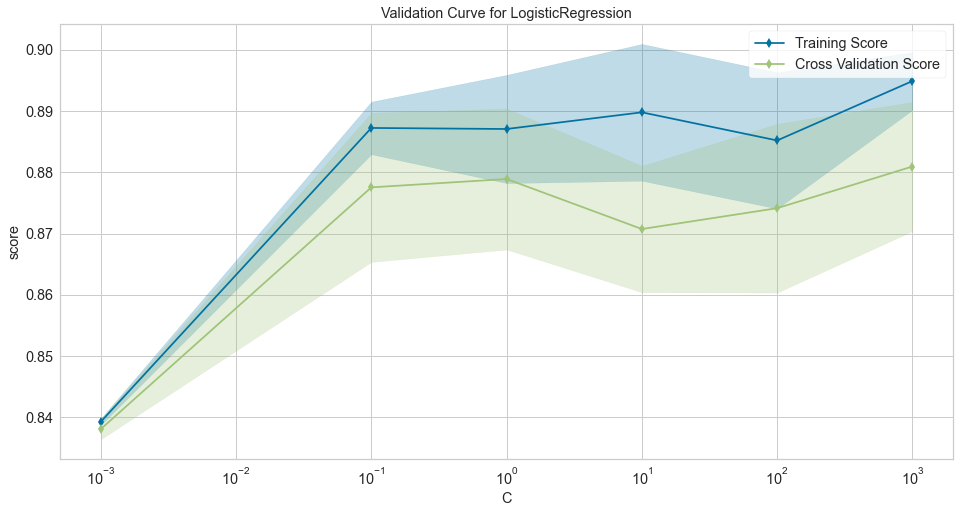

<AxesSubplot:title={'center':'Validation Curve for LogisticRegression'}, xlabel='C', ylabel='score'>

In [18]:
viz = ValidationCurve(
    LogisticRegression(solver = 'liblinear', max_iter = 10000),
    param_name="C",
    param_range=[0.001,0.1,1,10,100,1000],
    logx=True,
    cv=5,
    scoring="accuracy")

viz.fit(X, y)
viz.show()

# Learning Curve

- O quanto o estimador se beneficia de mais dados.

- Se o estimador é mais sensível ao erro de variância ou viés. 

- Se o escore de treino é maior que o escore de validação cruzada é provável que mais exemplos para treino sejam necessários para maior generalização do modelo. 

- Se o modelo sofre de erro de viés é provável que há mais variabilidade em volta da curva de escore de treino.

- Se o modelo sofre de erro de variância existirá maior variabilidade em volta do escore de validação cruzada

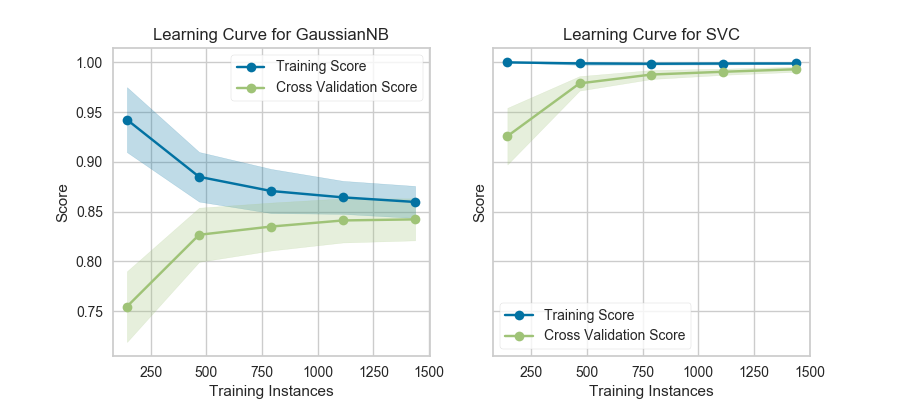

- Fonte: https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html

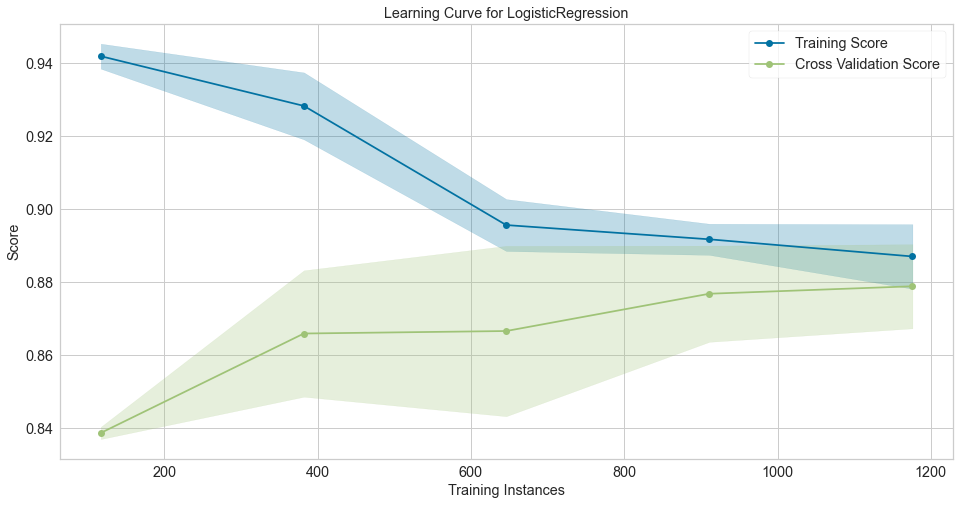

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [19]:
visualizer = LearningCurve(
    LogisticRegression(solver = 'liblinear', max_iter = 10000),
    param_name="C",
    param_range=[0.0001,0.1,1,10,100,1000],
    logx=True,
    cv=5,
    scoring="accuracy")

visualizer.fit(X, y)       
visualizer.show()   

- O que se conclui da imagem acima é que o escore de treinamento é maior que o escore de validação cruzada. O que indica que uma maior quantidade de observações pode auxiliar na capacidade de generalização do modelo.